<a href="https://colab.research.google.com/github/Zyuuu-G/ML-classwork/blob/main/HW4_Digits_Throwdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Dr D  
Class: PHYS453

hw 4

Ziyu Gao

4/5/2023

# HW4 - Digits Throwdown
In this assignment you will check how well our classifiers work on hand-written numbers.  [Tutorial 12](https://github.com/mdaugherity/MachineLearning2023/blob/main/Tutorial_12_Digits_Dataset.ipynb)
shows how to use the digits dataset.  Use it to help you get started.

# Tasks
You will evaluate 3 different classifiers on the digits dataset.  You have some specific tasks for each one:
1. GaussNB
    * Fit the training set, then find the score and confusion matrix for the test set
    * Use the `theta_` attribute to plot the average pixels for every number 0-9
2. Nearest Neighbors
    * Use the test data set to find the optimal value of k. Justify your answer.
    * Show the 5 nearest neighbors to the first sample in the test set `X_test[0]`
    * Show the 5 nearest neighbors to any one of the miss-classified points in the test set
3. Decision Tree
    * Use the test data set to find the optimal value of max_depth.  Justify your answer.
    * Use the feature_importances_ attribute and make a plot showing the most important pixels
4. Final Evaluation
    * After completing the first three tasks, explain which classifier is **best** for the digits dataset.  Justify your answer.

# Code
The only fair way to evaluate classifier performance is to test them with data they haven't been trained where you know the right answers.  So we will using a **test / train split** as illustrated below.  Use this code without modification.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from sklearn import neighbors
from sklearn import naive_bayes
#from sklearn import tree
from sklearn.datasets import load_digits
from sklearn import metrics  # for confusion matrix

We will load in the 1,797 samples from the data set and then split them (crudely):
* the first 1,697 will be used for training
* the last 100 will not be trained on and will only be used for testing the classifier's performance

In [ ]:
X,y = load_digits(return_X_y=True)

# Do a crude test/train split to evaluate classifiers
NUM_TEST = 100
X_train = X[:-NUM_TEST] # use these for training
y_train = y[:-NUM_TEST]
X_test = X[-NUM_TEST:]  # use these for testing
y_test = y[-NUM_TEST:]  # the right answers to check classifier's performance

print("Data:  ",X.shape,y.shape)
print("Train: ",X_train.shape, y_train.shape)
print("Test:  ",X_test.shape,y_test.shape)

NameError: ignored

You may only use the `fit` function on X_train and y_train. If you try to fit the test data you will be immediately expelled.

**Gauss Naive Bayes**

In [ ]:
from sklearn import naive_bayes

clfGNB = naive_bayes.GaussianNB()
clfGNB.fit(X_train,y_train)
clfGNB.score(X_train,y_train)

test_score_NB = clfGNB.score(X_test,y_test)

print("The test score for GaussNB is:",test_score_NB)

The test score for GaussNB is: 0.87


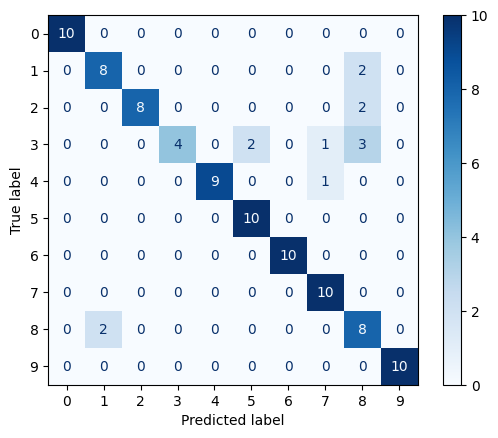

In [ ]:
y_pred_NB = clfGNB.predict(X_test)
pNB = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NB,cmap='Blues')
plt.show()

**Nearest Neighbors**

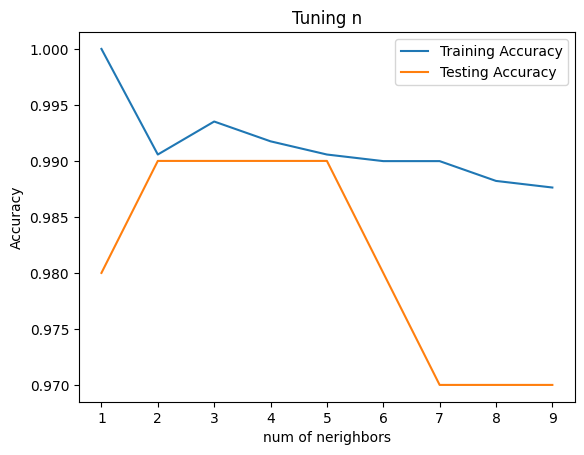

The test score for Nearest Neighbor is: 0.99


In [ ]:
from sklearn import neighbors

clfNei = neighbors.KNeighborsClassifier(n_neighbors=5)

nlist = np.arange(1,10)
train_scores = []
test_scores = []

for n in nlist:
  clf = neighbors.KNeighborsClassifier(n_neighbors=n)
  clf.fit(X_train,y_train)
  test_score = clf.score(X_test,y_test)
  train_score = clf.score(X_train,y_train)
  #print(k, train_score, test_score)
  train_scores.append(train_score)
  test_scores.append(test_score)

plt.plot(nlist, train_scores, label='Training Accuracy')
plt.plot(nlist, test_scores, label='Testing Accuracy')
plt.legend()
plt.xlabel('num of nerighbors')
plt.ylabel('Accuracy')
plt.title('Tuning n')
plt.show()

# Thus, the best number of neighbors will be picked as n=3
clfNghbr = neighbors.KNeighborsClassifier(n_neighbors=3)
clfNghbr.fit(X_train,y_train)

# check the score
test_score_nghbr = clfNghbr.score(X_test,y_test)
print("The test score for Nearest Neighbor is:",test_score_nghbr)

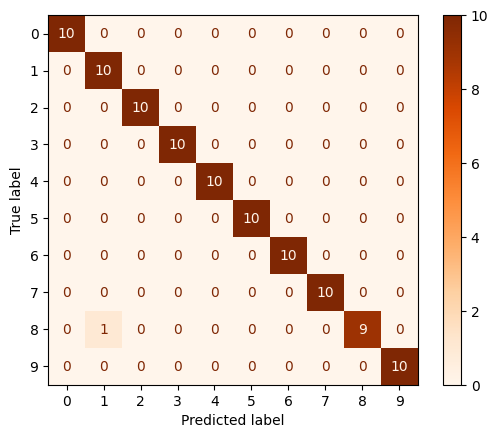

In [ ]:
y_pred_nghbr = clfNghbr.predict(X_test)

pNghbr = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nghbr,cmap='Oranges')
plt.show()

**Decision Tree**

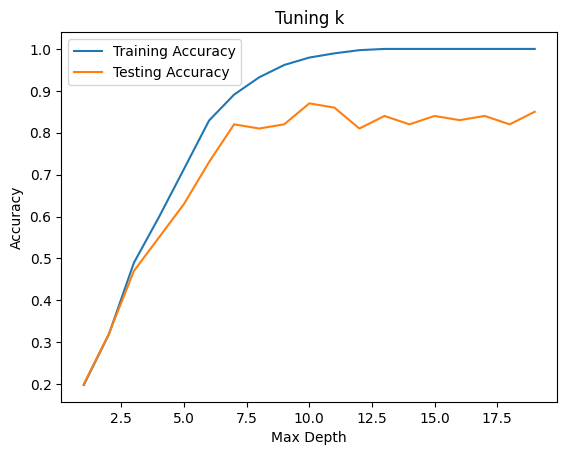

The test score for Decision Tree is: 0.85


In [ ]:
from sklearn import tree

Klist = np.arange(1,20)
train_scores = []
test_scores = []

for k in Klist:
  clf = tree.DecisionTreeClassifier(max_depth=k)
  clf.fit(X_train,y_train)
  test_score = clf.score(X_test,y_test)
  train_score = clf.score(X_train,y_train)
  #print(k, train_score, test_score)
  train_scores.append(train_score)
  test_scores.append(test_score)

plt.plot(Klist, train_scores, label='Training Accuracy')
plt.plot(Klist, test_scores, label='Testing Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Tuning k')
plt.show()

# Thus, the best max depth will be picked as k=10
clfTree = tree.DecisionTreeClassifier(max_depth=10)
clfTree.fit(X_train,y_train)

# check the score
test_score_tree = clfTree.score(X_test,y_test)
print("The test score for Decision Tree is:",test_score_tree)

Text(0, 0.5, 'Mean decrease in impurity')

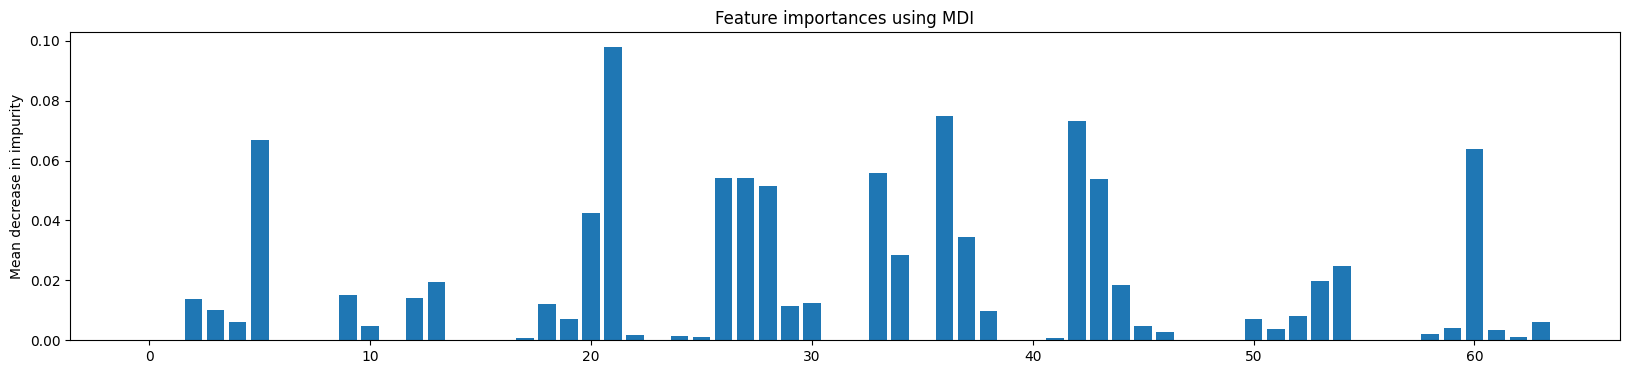

In [ ]:
importance  = clfTree.feature_importances_  # show the most impoetant pixels (notice the picture is 8x8)
#print(importance)
feature  = np.arange(0,64)
plt.figure(figsize=(20,4))
plt.bar(feature,importance)
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")

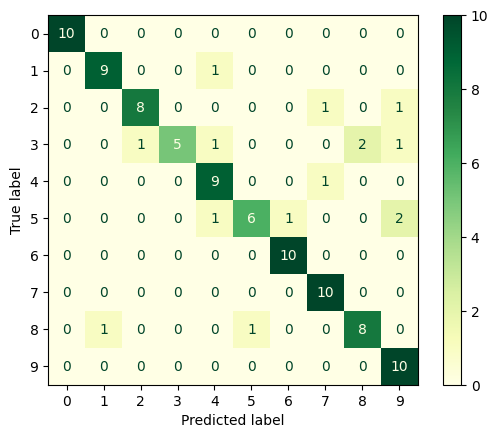

In [ ]:

y_pred_tree = clfTree.predict(X_test)
pTree = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree,cmap='YlGn')
plt.show()

**Comparison**

In [ ]:
"""
Among the three classifiers, Nearist Neighbor has the best performance for this data set.
"""

'\nAmong the three classifiers, Nearist Neighbor has the best performance for this data set. \n'

<Figure size 2000x400 with 0 Axes>

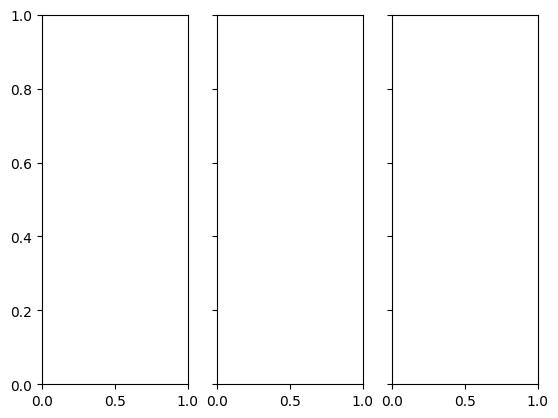

In [ ]:
## I was trying to put the plots together beside each other, but I couldn'tt get it to work lol.
plt.figure(figsize=(20,4))
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax1 = pNB
ax2 = pNghbr
ax3 = pTree

#ax1 = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NB,cmap='Blues')
#ax2 = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nghbr,cmap='Oranges')
#ax3 = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree,cmap='YlGn')
plt.show()